In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# define project paths
projectpath = 'projectpath'

train_data = pd.read_csv(projectpath + 'train_orig.csv',header=None)
test_data = pd.read_csv(projectpath + 'test_orig.csv',header=None)

In [4]:
# show training data
train_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,0,A,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,1,A,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,2,A,0,0,0,0,0,0,0,0,...,114,114,117,117,117,117,115,114,96,19
3,3,A,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,24,90,99,28


In [5]:
# show test data
test_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,2,22,...,1,0,18,159,239,255,255,255,234,115
1,1,0,7,106,182,183,176,171,171,171,...,3,0,3,97,201,240,243,210,102,1
2,2,0,0,0,0,0,0,0,0,0,...,195,235,255,254,255,247,199,197,207,145
3,3,2,0,10,96,181,227,248,255,255,...,0,0,0,0,2,0,22,190,248,156


In [6]:
# take labels into separate dataframe
train_target = train_data[1]

In [7]:
# delete unused columns
del train_data[0]
del train_data[1]
del test_data[0]

In [8]:
# check if columns were deleted correctly on training data
train_data.head(4)

,2,3,4,5,6,7,8,9,10,11,...,776,777,778,779,780,781,782,783,784,785
0,0,0,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,255,255,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,0,0,0,0,0,0,0,0,0,0,...,114,114,117,117,117,117,115,114,96,19
3,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,3,0,24,90,99,28


In [11]:
# store values in numpy array
train_data = train_data.values
test_data = test_data.values

In [13]:
# show training data array
train_data

array([[  0,   0,   0, ...,   8,  77,  13],
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 114,  96,  19],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [14]:
# reshape training and test data for tf/keras
X_train = train_data.reshape(-1, 28, 28 , 1).astype('float32')

In [15]:
X_test = test_data.reshape(-1, 28, 28 , 1).astype('float32')

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# split dataset into train (80%) and test data (20%); random_state=1 makes it reproducible (could be any number); stratify ensures that the proportion stays in test and training data sets
data_train, data_test, labels_train, labels_test = train_test_split(X_train, train_labels, test_size=0.2, random_state=1, shuffle=True, stratify=train_labels)

In [12]:
# import libraries and classes for and from keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')sns

Using TensorFlow backend.


In [13]:
# encode labels into numeric values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train_target = enc.fit_transform(train_target.values)

In [14]:
Y_train = to_categorical(train_target, num_classes = 10)

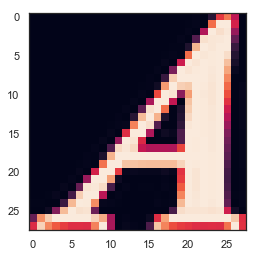

In [15]:
# show an image from training data
g = plt.imshow(X_train[25][:,:,0])

In [16]:
# check labels
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
from keras.layers import BatchNormalization

In [18]:
from keras.optimizers import RMSprop, Adam
from keras.layers import DepthwiseConv2D, Reshape, Activation

nets = 20
model = [0] *nets


for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.35))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    # before: adagrad-optimizer
    model[j].compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    
print('Done')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Done


In [19]:
# LR Reduction Callback
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=0, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [20]:
# train the data and print some information
history = [0] * nets
epochs = 30

datagen = ImageDataGenerator(
    rotation_range=13,
    zoom_range=0.11,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

for j in range(nets):
    print(f'Net : {j+1}')   
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[learning_rate_reduction], verbose=1)
    
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Net : 1
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
131/131 [==============================] - 46s 351ms/step - loss: 1.0069 - acc: 0.6908 - val_loss: 0.3777 - val_acc: 0.8910
Epoch 2/30
131/131 [==============================] - 41s 312ms/step - loss: 0.5710 - acc: 0.8276 - val_loss: 0.3035 - val_acc: 0.9071
Epoch 3/30
131/131 [==============================] - 41s 310ms/step - loss: 0.4982 - acc: 0.8521 - val_loss: 0.2781 - val_acc: 0.9220
Epoch 4/30
131/131 [==============================] - 41s 312ms/step - loss: 0.4417 - acc: 0.8652 - val_loss: 0.2458 - val_acc: 0.9295
Epoch 5/30
131/131 [==============================] - 40s 302ms/step - loss: 0.3998 - acc: 0.8825 - val_loss: 0.2387 - val_acc: 0.9306
Epoch 6/30
131/131 [==============================] - 41s 316ms/step - loss: 0.3629 - acc: 0.8924 - val_loss: 0.2119 - val_acc: 0.9306
Epoch 7/30
131/131 [==============================] - 41s 312ms/step - loss: 0.3473 - acc: 0.8938 - val_loss: 0.2207 - val_acc: 0.9380

131/131 [==============================] - 40s 306ms/step - loss: 0.2356 - acc: 0.9296 - val_loss: 0.1775 - val_acc: 0.9434
Epoch 28/30
131/131 [==============================] - 41s 312ms/step - loss: 0.2322 - acc: 0.9278 - val_loss: 0.1772 - val_acc: 0.9423
Epoch 29/30
131/131 [==============================] - 42s 319ms/step - loss: 0.2258 - acc: 0.9316 - val_loss: 0.1832 - val_acc: 0.9391
Epoch 30/30
131/131 [==============================] - 42s 319ms/step - loss: 0.2295 - acc: 0.9302 - val_loss: 0.1793 - val_acc: 0.9391
CNN 4: Epochs=30, Train accuracy=0.93158, Validation accuracy=0.94444
Net : 5
Epoch 1/30
131/131 [==============================] - 44s 336ms/step - loss: 0.9994 - acc: 0.7012 - val_loss: 0.4350 - val_acc: 0.8729
Epoch 2/30
131/131 [==============================] - 42s 318ms/step - loss: 0.5616 - acc: 0.8323 - val_loss: 0.3260 - val_acc: 0.9103
Epoch 3/30
131/131 [==============================] - 40s 308ms/step - loss: 0.4800 - acc: 0.8586 - val_loss: 0.3250 - v

131/131 [==============================] - 41s 311ms/step - loss: 0.2094 - acc: 0.9374 - val_loss: 0.2308 - val_acc: 0.9295
Epoch 26/30
131/131 [==============================] - 41s 316ms/step - loss: 0.2140 - acc: 0.9346 - val_loss: 0.2273 - val_acc: 0.9316
Epoch 27/30
131/131 [==============================] - 40s 308ms/step - loss: 0.2278 - acc: 0.9316 - val_loss: 0.2269 - val_acc: 0.9295
Epoch 28/30
131/131 [==============================] - 42s 317ms/step - loss: 0.2174 - acc: 0.9343 - val_loss: 0.2254 - val_acc: 0.9306
Epoch 29/30
131/131 [==============================] - 40s 308ms/step - loss: 0.2187 - acc: 0.9333 - val_loss: 0.2268 - val_acc: 0.9306
Epoch 30/30
131/131 [==============================] - 41s 310ms/step - loss: 0.2162 - acc: 0.9338 - val_loss: 0.2274 - val_acc: 0.9295
CNN 8: Epochs=30, Train accuracy=0.93732, Validation accuracy=0.93162
Net : 9
Epoch 1/30
131/131 [==============================] - 44s 334ms/step - loss: 1.0024 - acc: 0.6933 - val_loss: 0.4409 -

131/131 [==============================] - 43s 325ms/step - loss: 0.2355 - acc: 0.9283 - val_loss: 0.2110 - val_acc: 0.9327
Epoch 24/30
131/131 [==============================] - 43s 326ms/step - loss: 0.2396 - acc: 0.9261 - val_loss: 0.2106 - val_acc: 0.9327
Epoch 25/30
131/131 [==============================] - 42s 321ms/step - loss: 0.2280 - acc: 0.9326 - val_loss: 0.2110 - val_acc: 0.9327
Epoch 26/30
131/131 [==============================] - 43s 325ms/step - loss: 0.2347 - acc: 0.9290 - val_loss: 0.2095 - val_acc: 0.9338
Epoch 27/30
131/131 [==============================] - 42s 323ms/step - loss: 0.2246 - acc: 0.9297 - val_loss: 0.2086 - val_acc: 0.9338
Epoch 28/30
131/131 [==============================] - 42s 324ms/step - loss: 0.2306 - acc: 0.9264 - val_loss: 0.2079 - val_acc: 0.9338
Epoch 29/30
131/131 [==============================] - 43s 325ms/step - loss: 0.2274 - acc: 0.9312 - val_loss: 0.2066 - val_acc: 0.9338
Epoch 30/30
131/131 [==============================] - 43s 3

131/131 [==============================] - 42s 318ms/step - loss: 0.2505 - acc: 0.9227 - val_loss: 0.3208 - val_acc: 0.9017
Epoch 22/30
131/131 [==============================] - 41s 315ms/step - loss: 0.2386 - acc: 0.9273 - val_loss: 0.1717 - val_acc: 0.9509
Epoch 23/30
131/131 [==============================] - 42s 319ms/step - loss: 0.2269 - acc: 0.9296 - val_loss: 0.1753 - val_acc: 0.9498
Epoch 24/30
131/131 [==============================] - 40s 307ms/step - loss: 0.2159 - acc: 0.9325 - val_loss: 0.1727 - val_acc: 0.9509
Epoch 25/30
131/131 [==============================] - 42s 319ms/step - loss: 0.2060 - acc: 0.9367 - val_loss: 0.1709 - val_acc: 0.9551
Epoch 26/30
131/131 [==============================] - 42s 317ms/step - loss: 0.2144 - acc: 0.9330 - val_loss: 0.1657 - val_acc: 0.9519
Epoch 27/30
131/131 [==============================] - 41s 312ms/step - loss: 0.2063 - acc: 0.9368 - val_loss: 0.1641 - val_acc: 0.9551
Epoch 28/30
131/131 [==============================] - 42s 3

131/131 [==============================] - 42s 321ms/step - loss: 0.2436 - acc: 0.9246 - val_loss: 0.1660 - val_acc: 0.9444
Epoch 20/30
131/131 [==============================] - 40s 309ms/step - loss: 0.2337 - acc: 0.9268 - val_loss: 0.1622 - val_acc: 0.9444
Epoch 21/30
131/131 [==============================] - 42s 321ms/step - loss: 0.2409 - acc: 0.9298 - val_loss: 0.1641 - val_acc: 0.9466
Epoch 22/30
131/131 [==============================] - 41s 316ms/step - loss: 0.2261 - acc: 0.9283 - val_loss: 0.1591 - val_acc: 0.9455
Epoch 23/30
131/131 [==============================] - 41s 316ms/step - loss: 0.2474 - acc: 0.9240 - val_loss: 0.1647 - val_acc: 0.9444
Epoch 24/30
131/131 [==============================] - 42s 319ms/step - loss: 0.2314 - acc: 0.9300 - val_loss: 0.1592 - val_acc: 0.9487
Epoch 25/30
131/131 [==============================] - 41s 311ms/step - loss: 0.2344 - acc: 0.9285 - val_loss: 0.1590 - val_acc: 0.9434
Epoch 26/30
131/131 [==============================] - 42s 3

In [21]:
# make submision
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)

In [22]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="target")
submission = pd.concat([pd.Series(range(0,9364),name = "Id"),results],axis = 1)

In [23]:
# show submission
submission.head()

,Id,target
0,0,0
1,1,7
2,2,0
3,3,0
4,4,7


In [24]:
# encode labels back into original values
submission['target'] = enc.inverse_transform(submission['target'])

In [25]:
submission.head()

,Id,target
0,0,A
1,1,H
2,2,A
3,3,A
4,4,H


In [26]:
# check submission
submission.shape

(9364, 2)

In [27]:
submission.target.value_counts()

J    980
D    978
G    955
H    944
E    940
F    934
B    923
C    919
A    910
I    881
Name: target, dtype: int64

In [28]:
# save submission to csv
submission.to_csv('submission.csv', index=False)